# AI: K-Mean

## Clusterization problem with K-Mean: what kind of customers do we have?

In this project I use my own designed K-Mean and DataTable packages to get clusters of our customers based on their attributes.

I'll walk you through this process of model definition, fine-tuning and evaluation. You might want to jump to the interesting section immediately.


1. [Section 1](#id_1)- preparation
2. [Section 2](#id_2)- model building
3. [Section 3](#id_3)- K-Mean first try
4. [Section 4](#id_4)- K-Mean full up
4. [Section 5](#id_5)- results


# Introduction
I had developed my own Pandas-like simplified package data_reader.py to fetch different kind of data faster than Pandas can do and contains main features for K-Mean AI like data preparation for training/testing, split data, adding new features, creating combined one, ploting and many others. 

In addition, to enhance my AI regression model's knowledge, I designed a kmean.py package, which is pre-configured to initialize 20 times different starting positions of centroids, 5 times iteration for each training and returning the best centroids based on min cost function which was achieved after model training. 

All these features and techniques I would like to show in this notebook.

For additional package usage, refer to doxy in its src code.

For that session, I'm going to use a /data/Cust_Segmentation.csv file, which contains table-like structure data of our customers.

# Section 1<a id='id_1'></a> - preparation

In [1]:
# upload packages
import data_reader as dr
import clusterization.kmean as km
import matplotlib.pyplot as plt
import random

In [2]:
# to have similar random results
random.seed(301)

In [3]:
# data uploading and feature enablement
main_table = dr.DataTable("data/Cust_Segmentation.csv")

In [4]:
# returns all features from our data
main_table.head

['Customer Id',
 'Age',
 'Edu',
 'Years Employed',
 'Income',
 'Card Debt',
 'Other Debt',
 'Defaulted',
 'Address',
 'DebtIncomeRatio']

Let's pick few features up for further analysis and K-Mean testing. I'm interested in attitude between Income vs Years Employed.

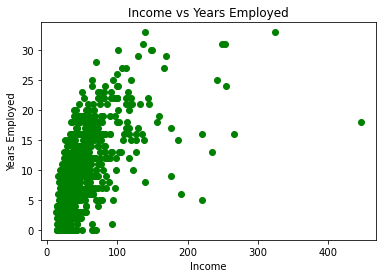

In [5]:
plt.title("Income vs Years Employed")
main_table.plot("Income", "Years Employed")

Cool, let's apply K-Mean with 2 clusters. But before, let's scale our data to range -1...+1 for better training experience, assuming we calculate distance between points in same scale.

In [6]:
 main_table.max_scaling()

Column Customer Id was scaled
Column Age was scaled
Column Edu was scaled
Column Years Employed was scaled
Column Income was scaled
Column Card Debt was scaled
Column Other Debt was scaled
Column Defaulted was scaled
Column Address was scaled
Column DebtIncomeRatio was scaled


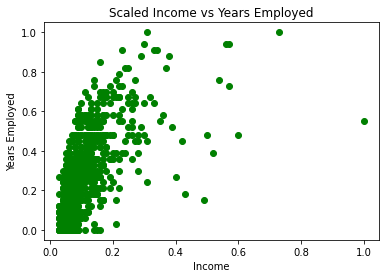

In [7]:
# new plot
plt.title("Scaled Income vs Years Employed")
main_table.plot("Income", "Years Employed")

In [8]:
main_table.activate_features(["Income", "Years Employed"])
main_table.select_target("Customer Id")

Feature Income was added
Feature Years Employed was added
Target Customer Id was added


# Section 2<a id='id_2'></a> - model building

In [9]:
# split data
main_table.split_data(0.7, shuffle=True)

Shuffle was done
Data was split as follows: 0.7 training set and 0.30000000000000004 testing set


In [10]:
# here we do training.testing data generation from our data set
min_max_info = main_table.get_min_max_features()
training_data = main_table.get_training_data()
test_data = main_table.get_testing_data()
training_data = training_data[0]
test_data = test_data[0]

# set labels for further data visualization
labels = main_table.get_labels()[0]

In [11]:
# model initialization
model_kmean = km.KMean()

In [12]:
# let's do K-Mean algo only 3 times for different randomly init centroids
model_kmean.NUMBER_OF_CENTROIDS_INITIALIZATION = 3
model_kmean.set_labels(labels)

# next command allows to visualizate every learning iteration
# during method .fit()
model_kmean.set_monitor(True)

# set 5 learning iterations
model_kmean.epoch = 5

# set 3 number of centroids
model_kmean.number_of_centroids = 3

# what data will be used for the learning?
model_kmean.set_training_data(training_data)

# additional in case of centroid random initialization in range min-max
# (not in the use right now)
model_kmean.set_min_max_ranges(min_max_info)

# we want to pick points up randomly from 
# our data set and make them as our initial centroids.
# to do that, set centroid_mode to None
model_kmean.centroid_mode = None 

# Section 3<a id='id_3'></a> - first try

Let's find our the best three centroids for our data. We are going to do 3 times random centroid initialization and to have 5 learning iterations for each.

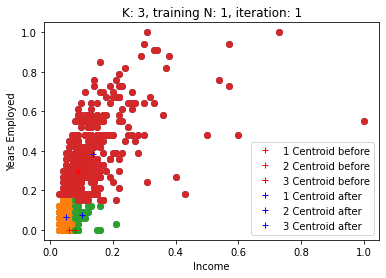

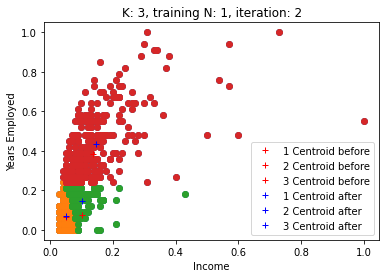

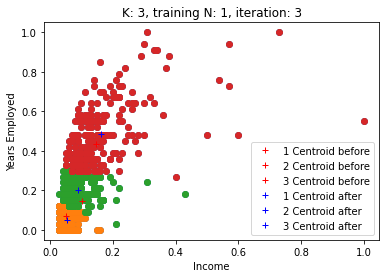

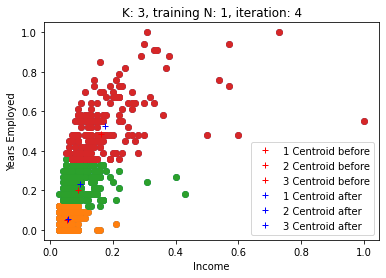

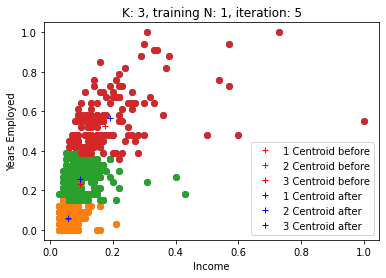

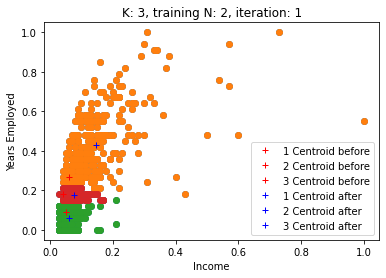

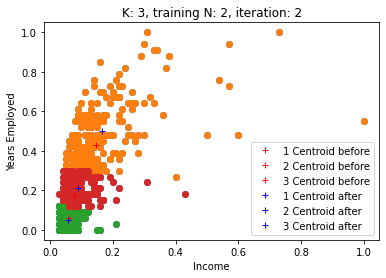

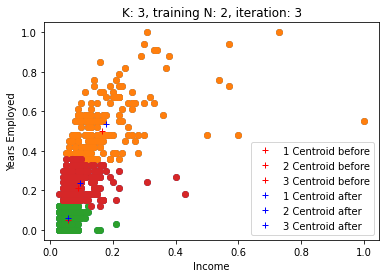

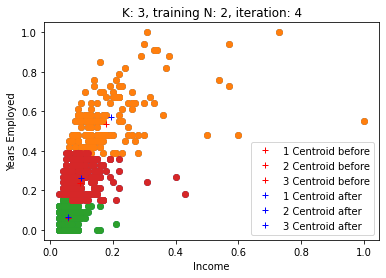

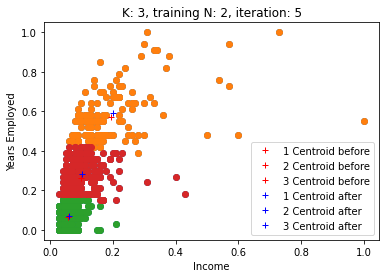

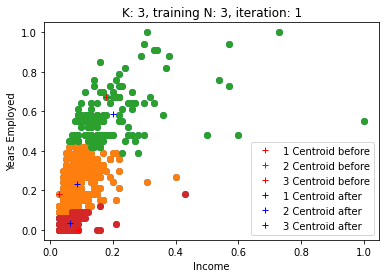

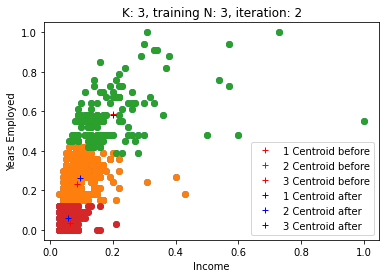

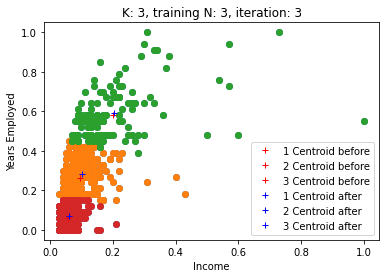

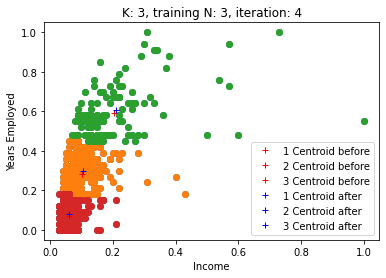

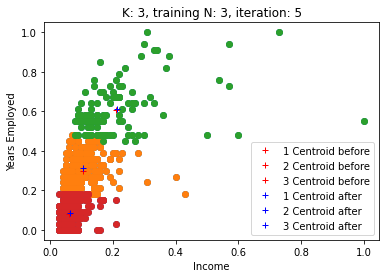

In [13]:
model_kmean.fit()

There is logs' saving during learning process. It stores the best logs which happened during all training session based on cost function (means every new centroid initialization gives different final cost function, so the model saves the training process and its centroids for the lowest achieved value of the cost function). Let's analyse them.

Text(0, 0.5, 'Cost function')

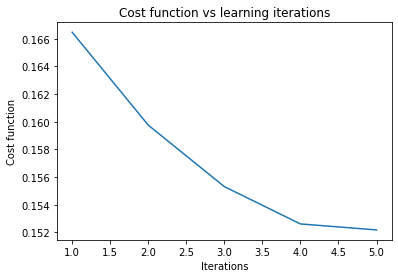

In [14]:
cost_functions = model_kmean.cost_functions
axis_x = [x for x in range(1, model_kmean.epoch+1)]
plt.plot(axis_x, cost_functions)
plt.title("Cost function vs learning iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost function")

In [15]:
# Best centroids:
model_kmean.centroids

[[0.05828239984056782, 0.06169536066651156],
 [0.09649010587881882, 0.25685919395944873],
 [0.1919339918674164, 0.5648802402971185]]

# Section 4<a id='id_4'></a> - full up

In this section I want to find out which K is the best to minimize cost function of the model for these 2 features: Income vs Years Employed.

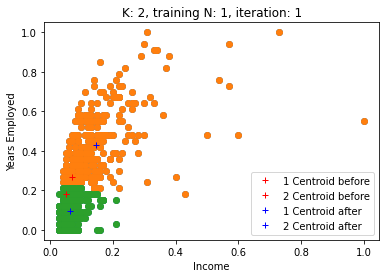

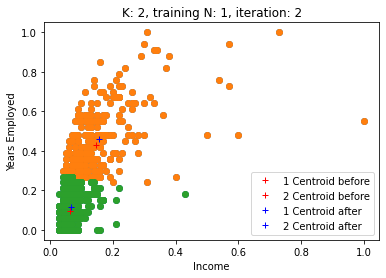

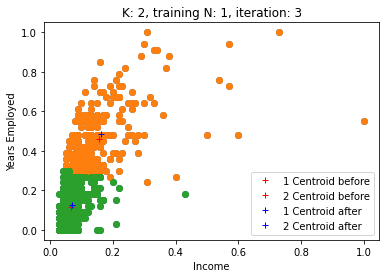

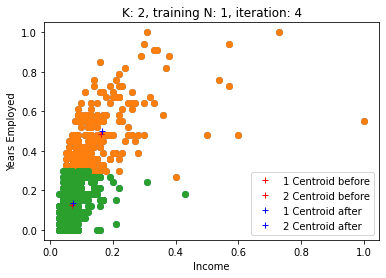

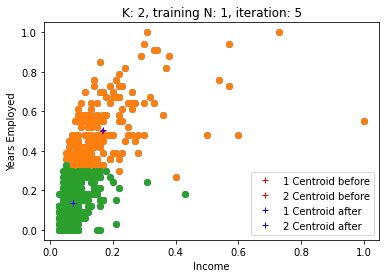

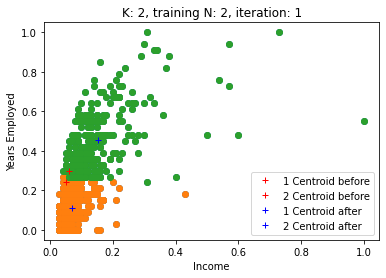

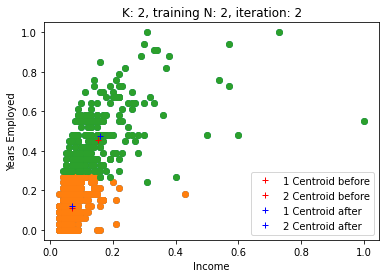

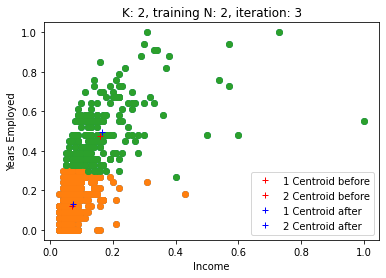

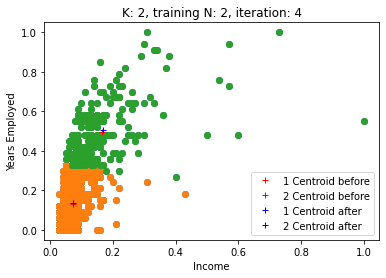

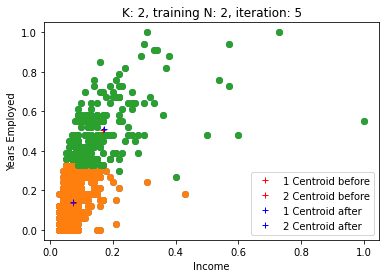

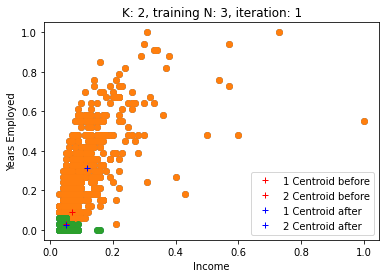

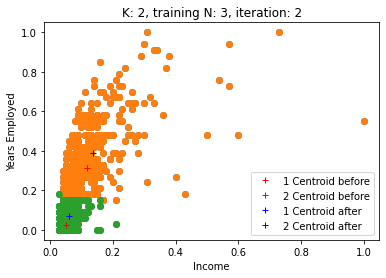

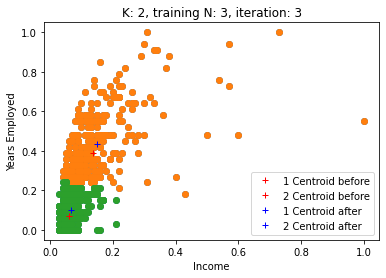

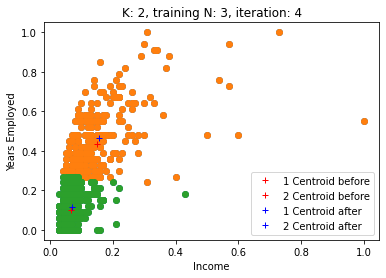

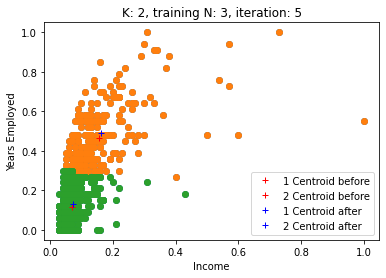

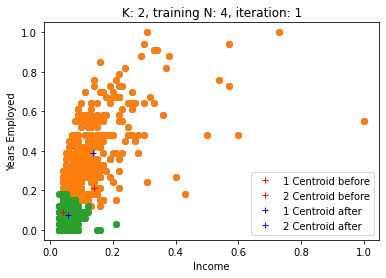

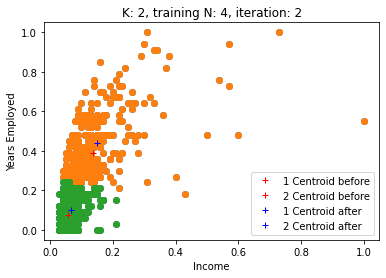

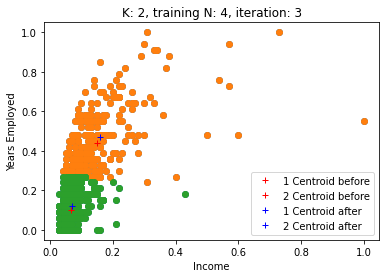

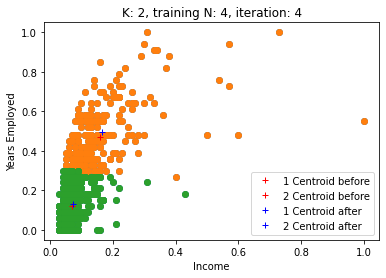

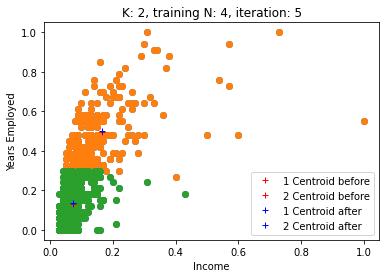

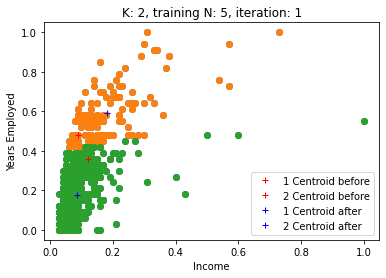

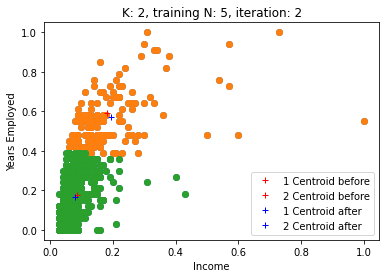

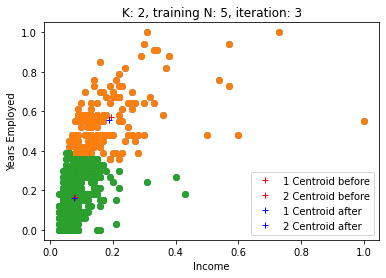

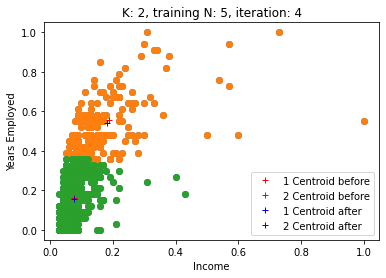

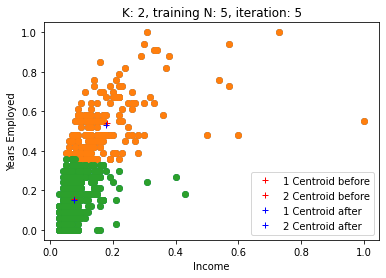

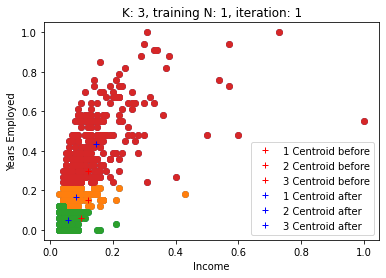

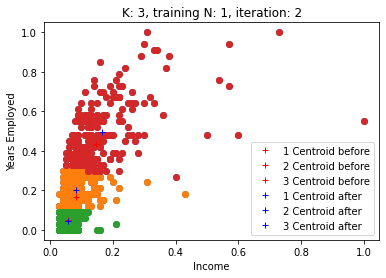

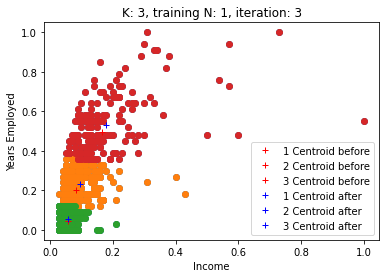

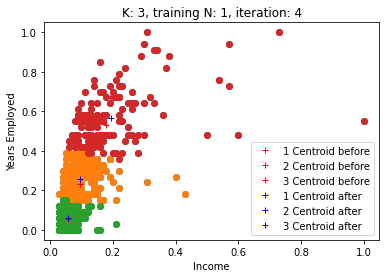

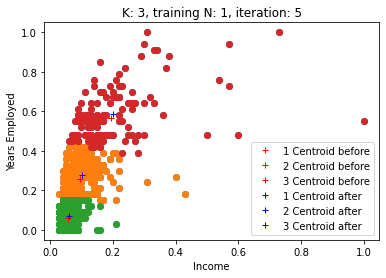

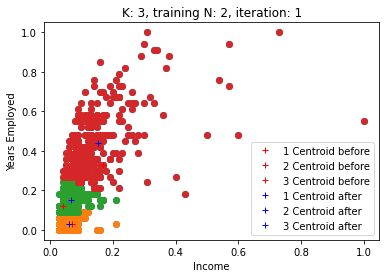

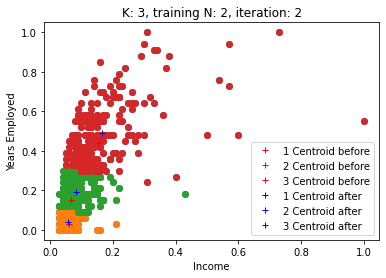

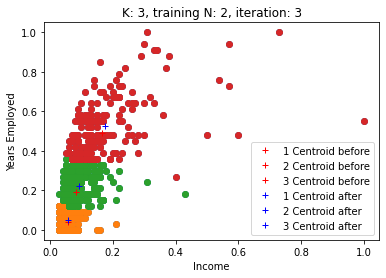

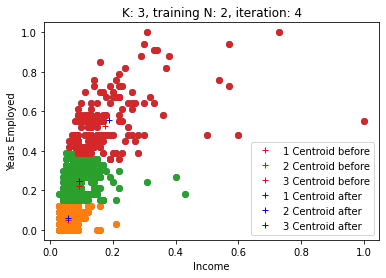

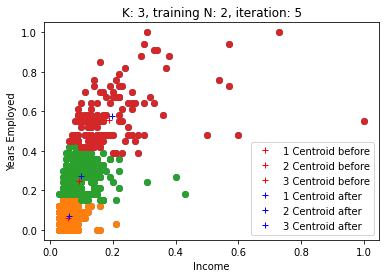

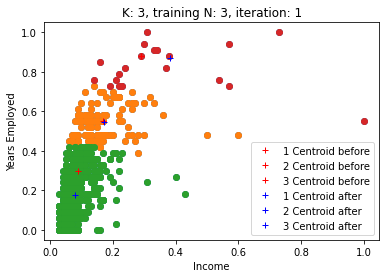

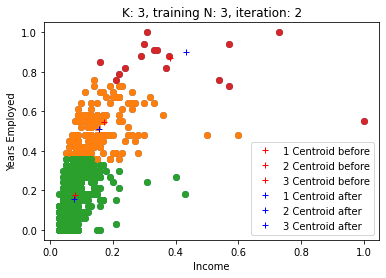

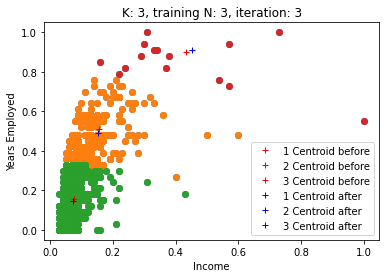

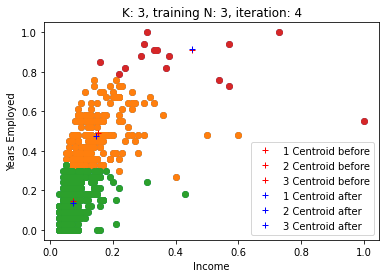

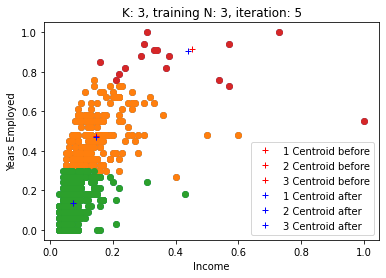

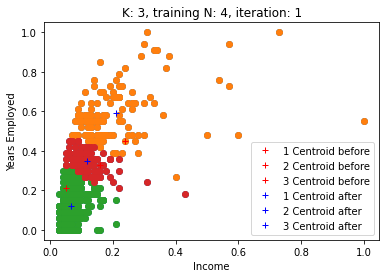

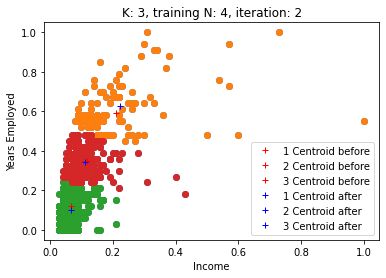

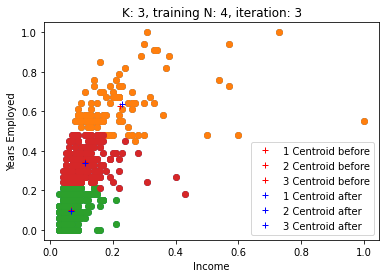

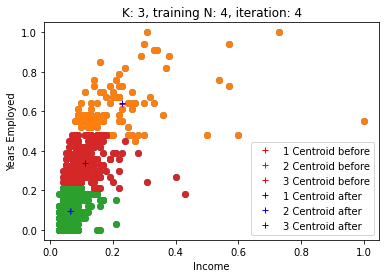

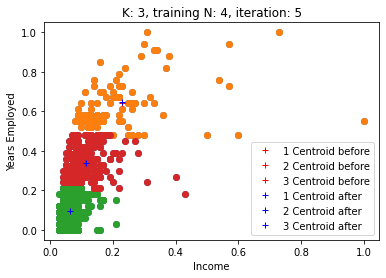

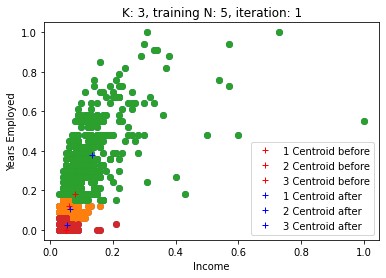

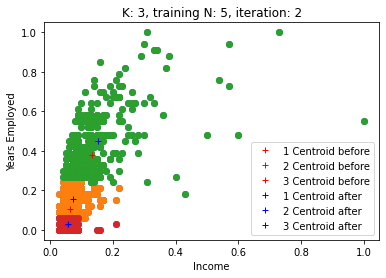

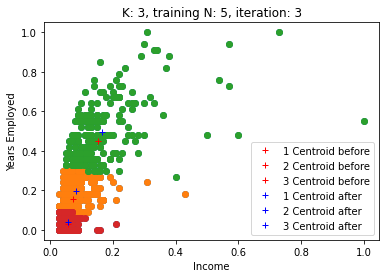

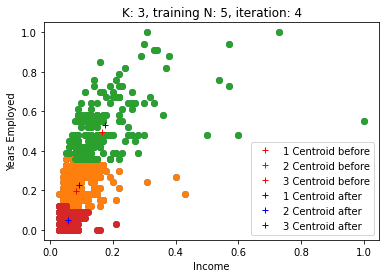

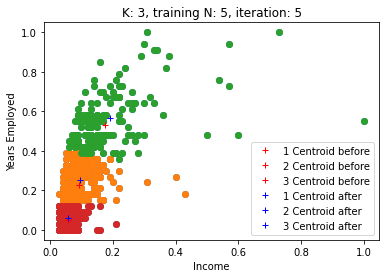

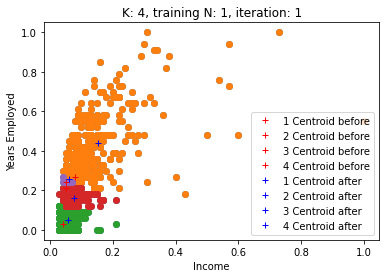

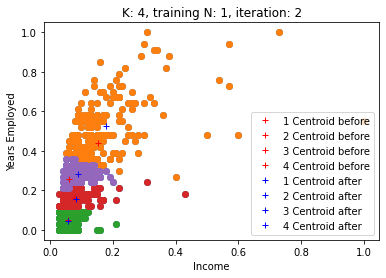

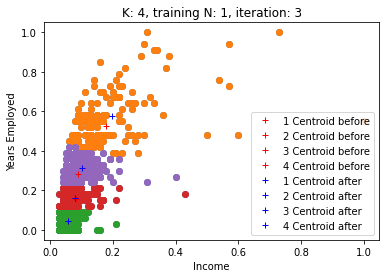

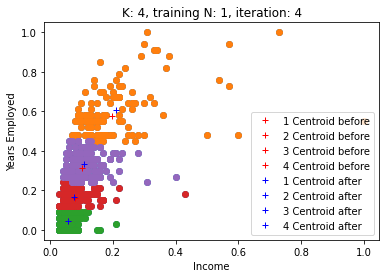

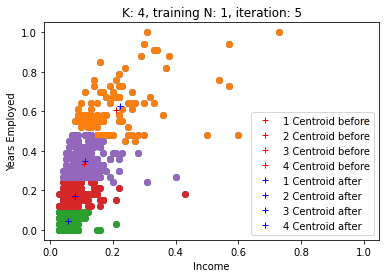

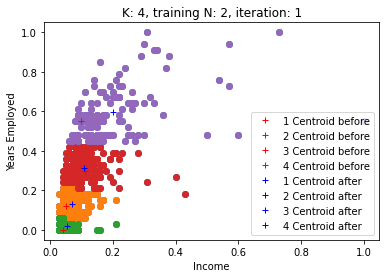

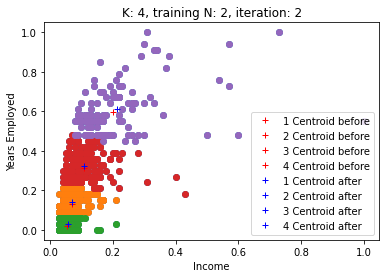

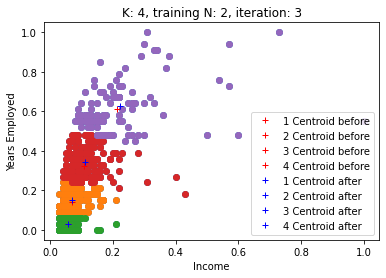

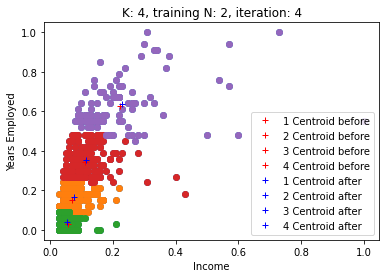

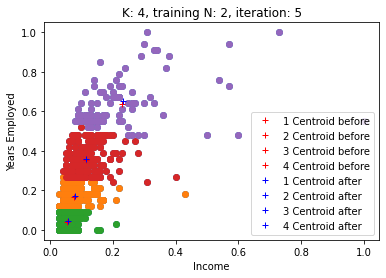

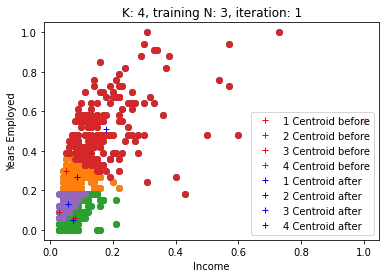

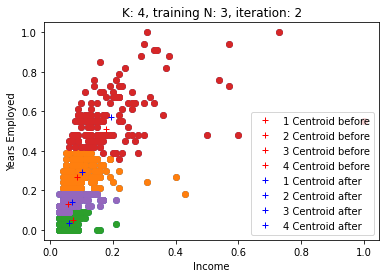

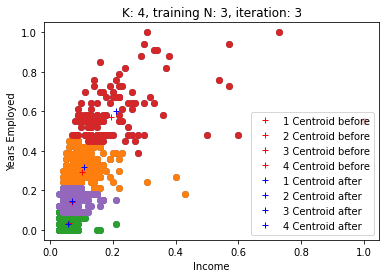

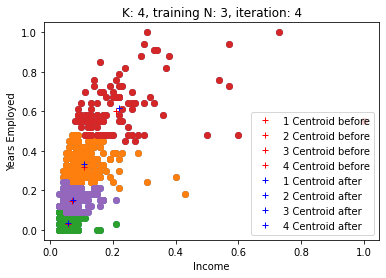

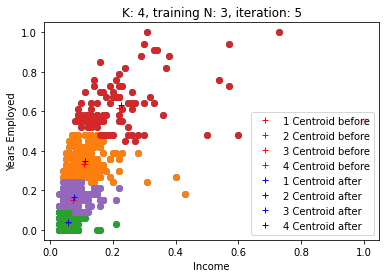

Centroid 3 doesn't have any point


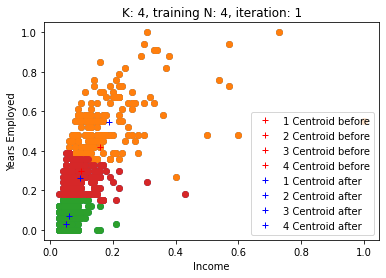

There is no point assigned to this 3 centroid


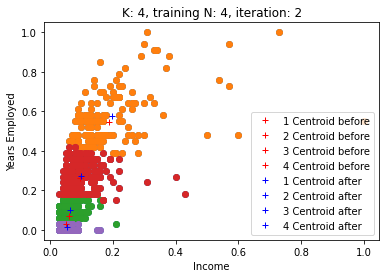

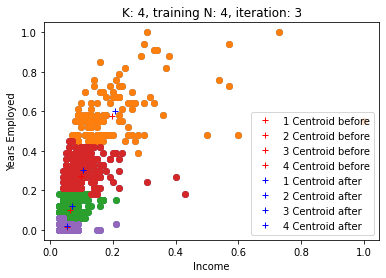

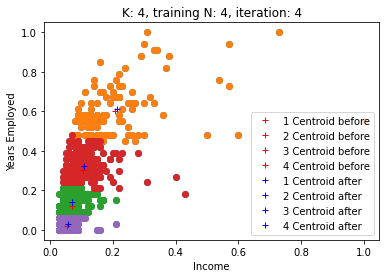

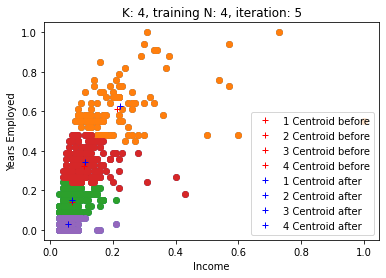

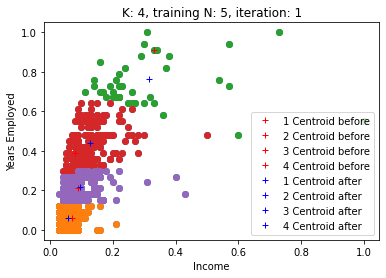

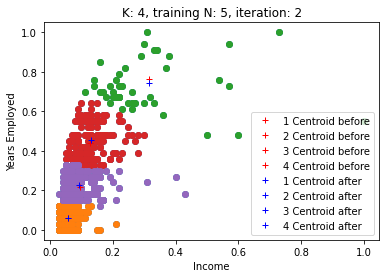

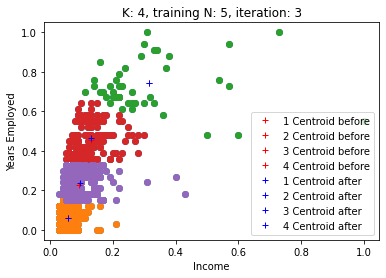

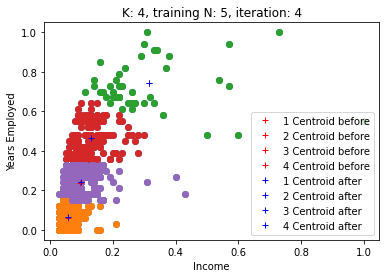

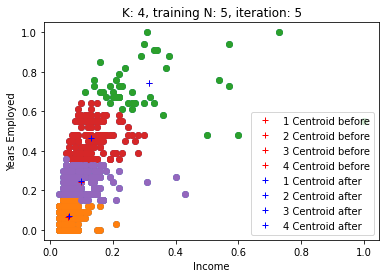

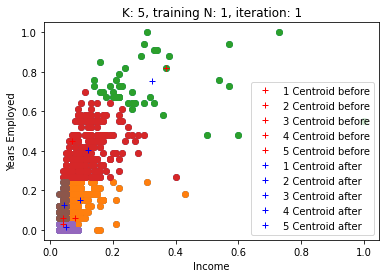

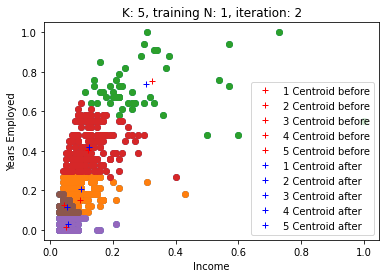

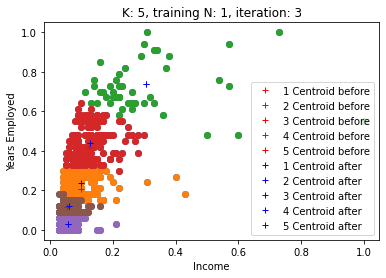

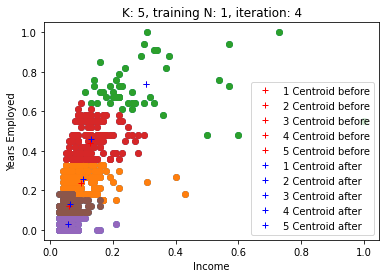

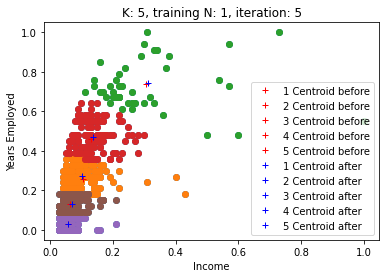

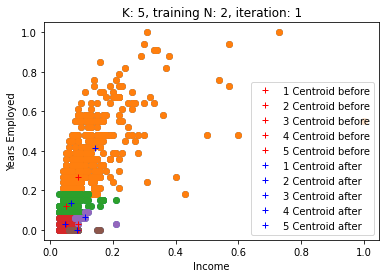

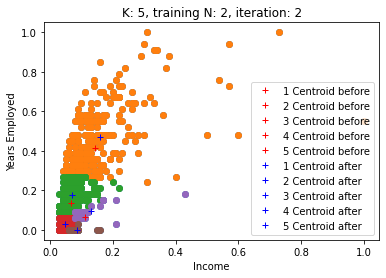

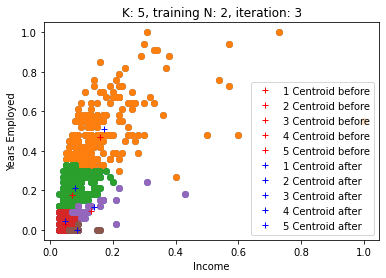

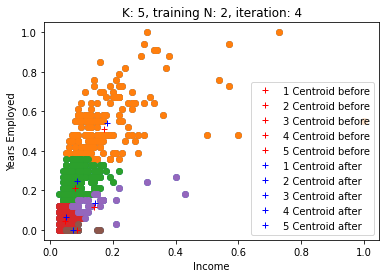

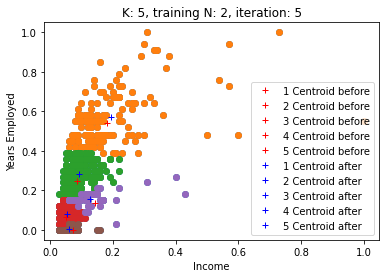

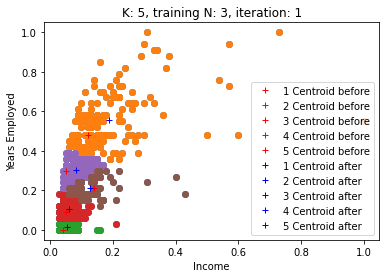

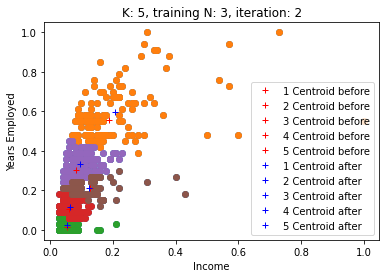

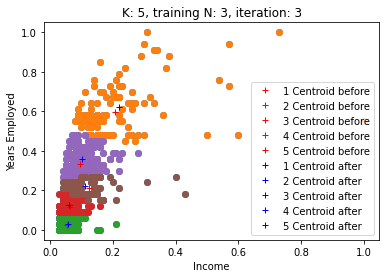

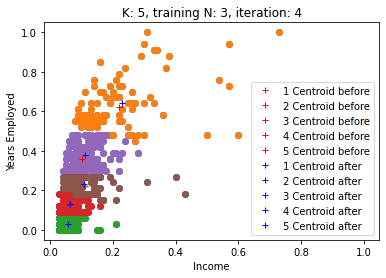

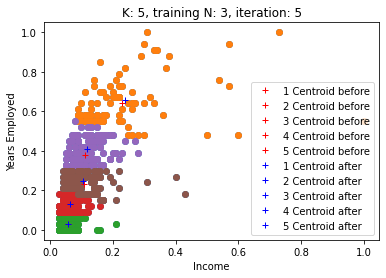

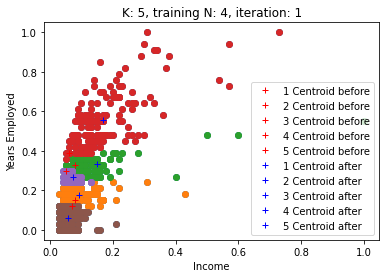

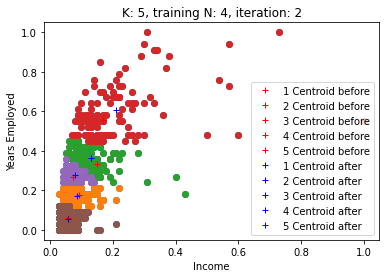

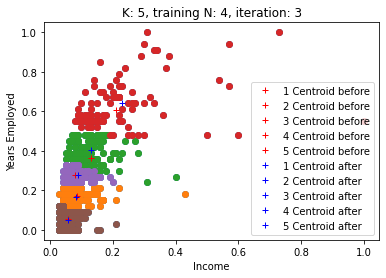

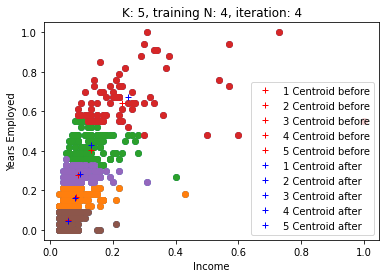

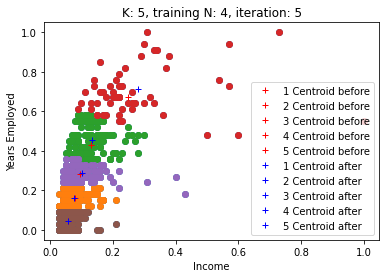

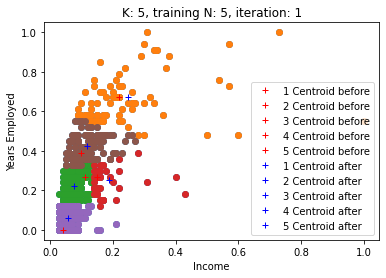

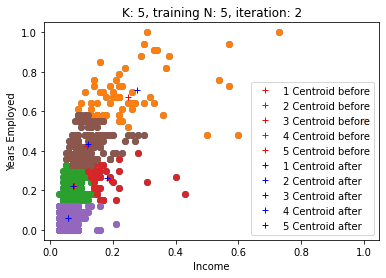

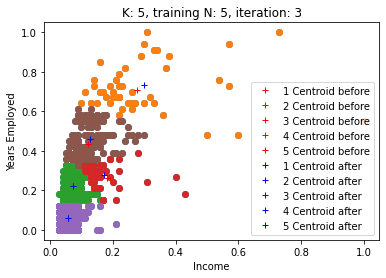

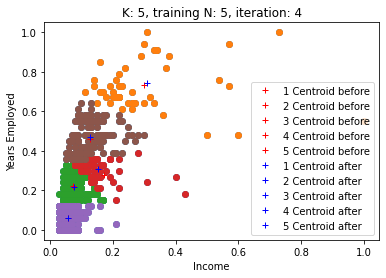

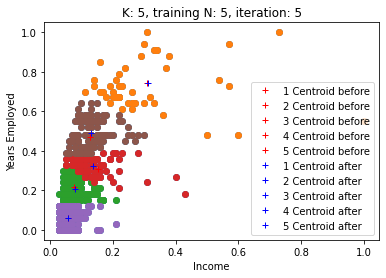

Centroid 5 doesn't have any point


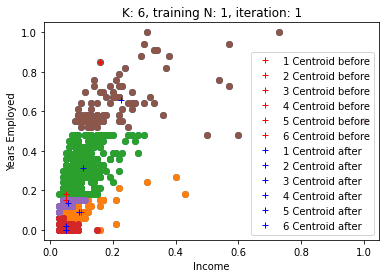

There is no point assigned to this 5 centroid


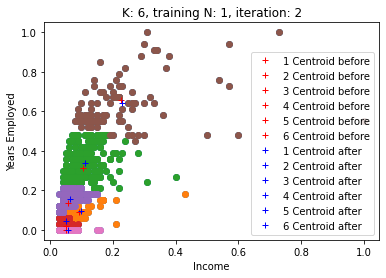

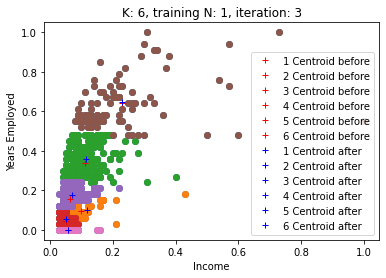

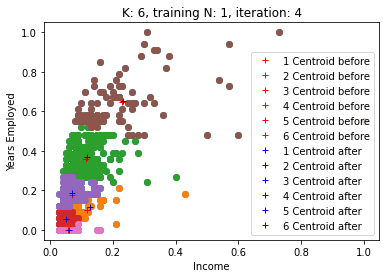

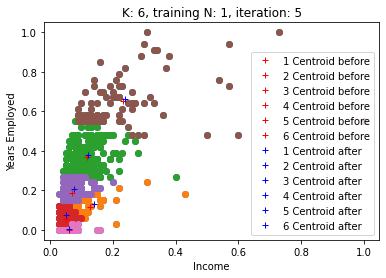

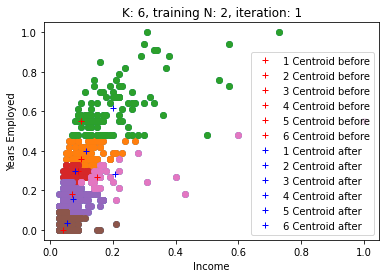

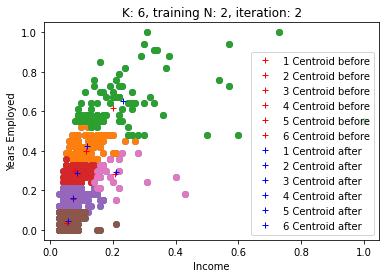

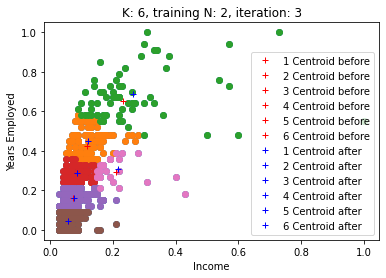

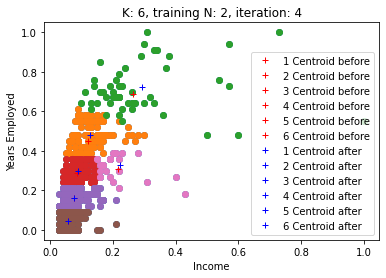

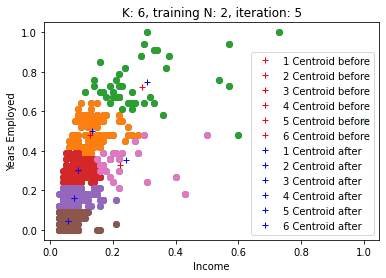

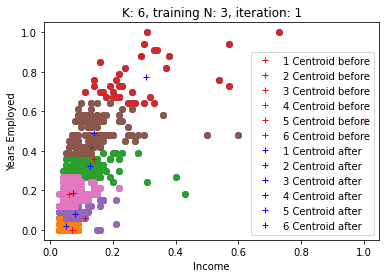

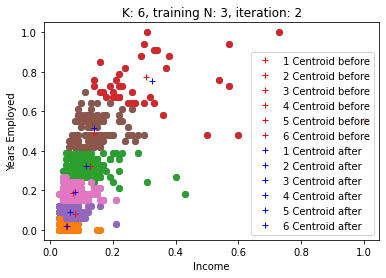

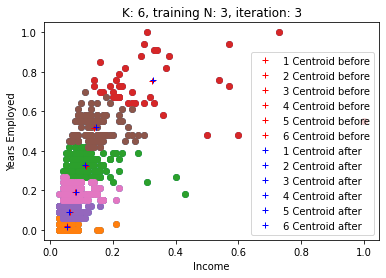

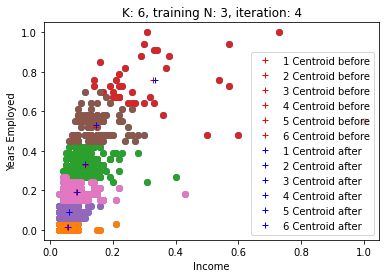

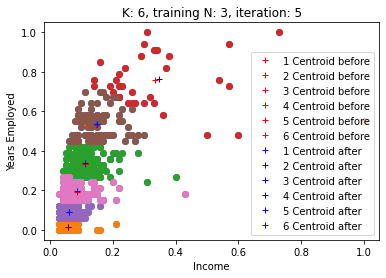

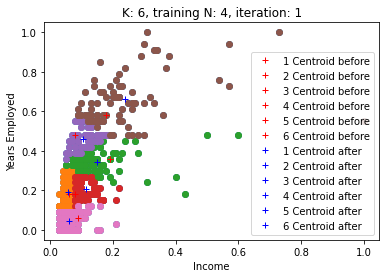

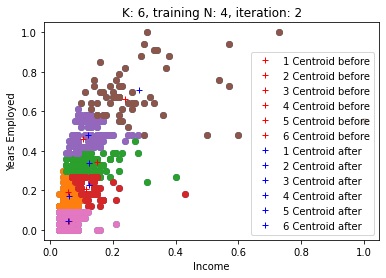

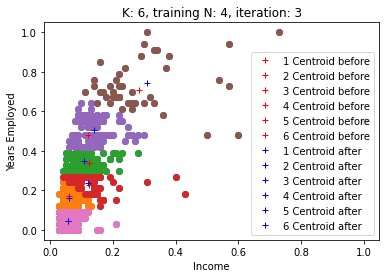

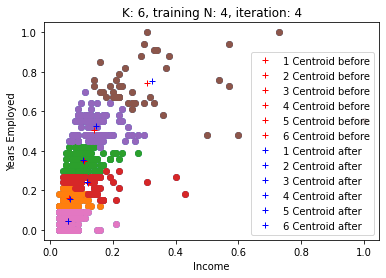

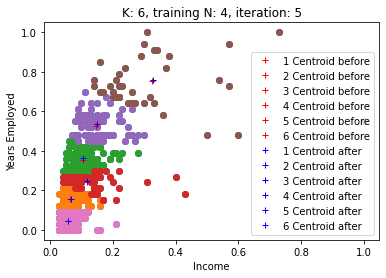

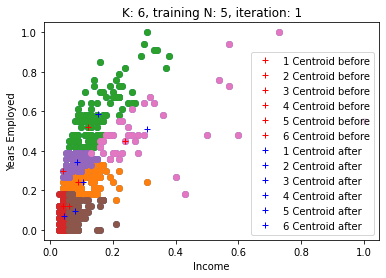

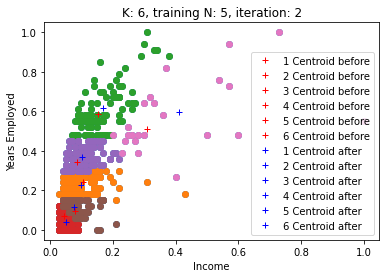

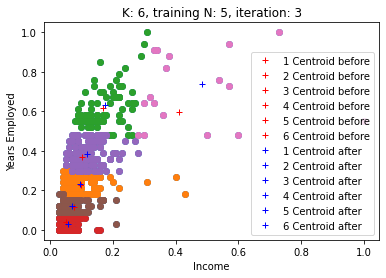

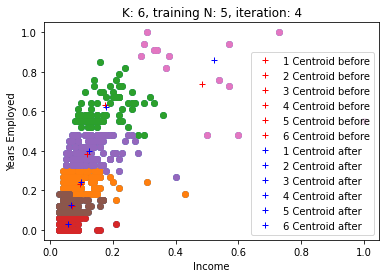

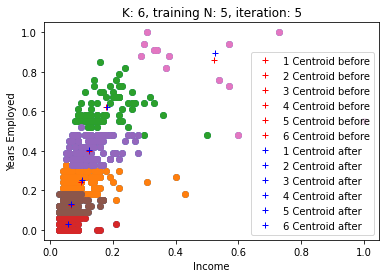

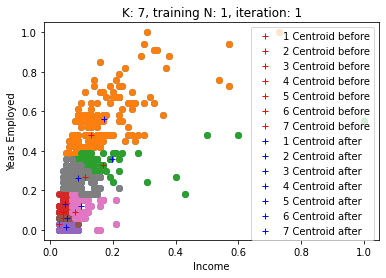

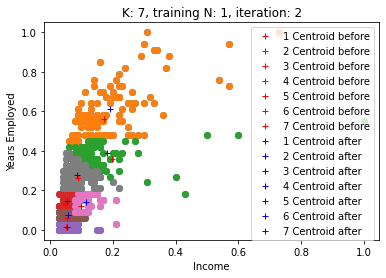

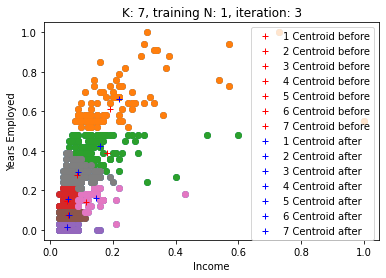

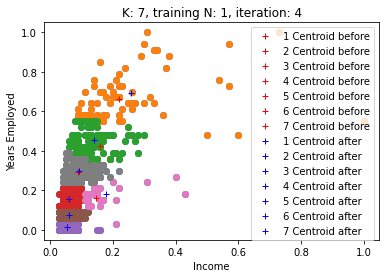

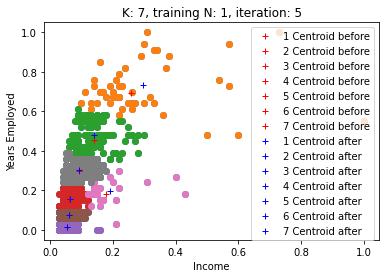

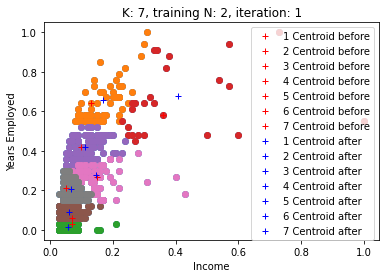

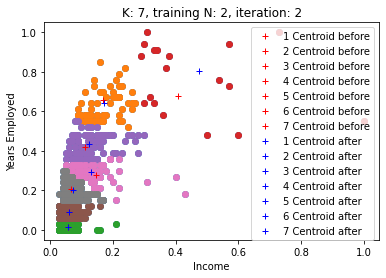

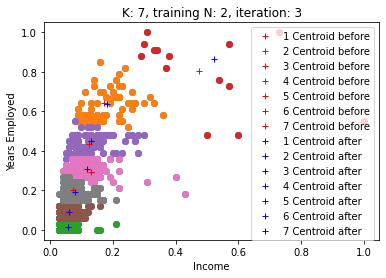

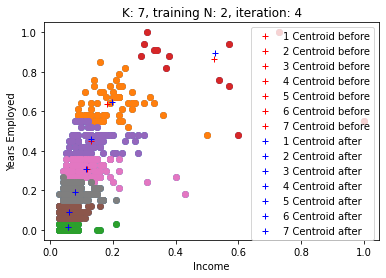

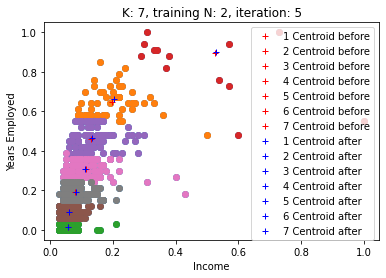

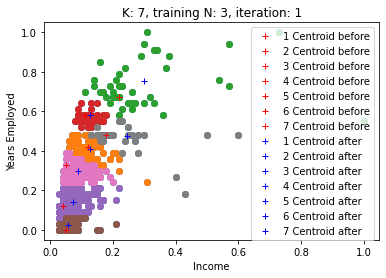

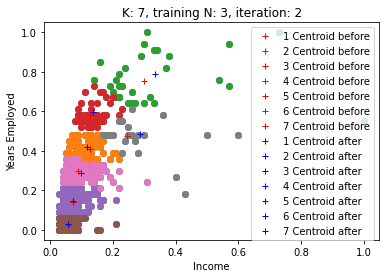

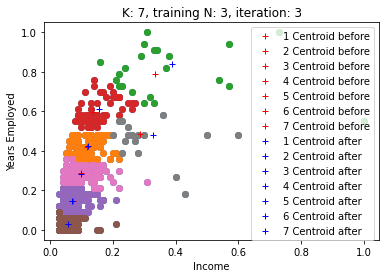

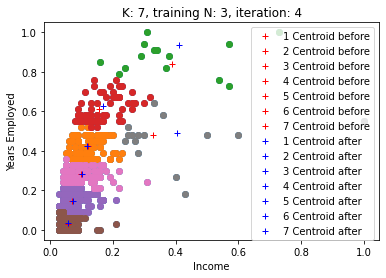

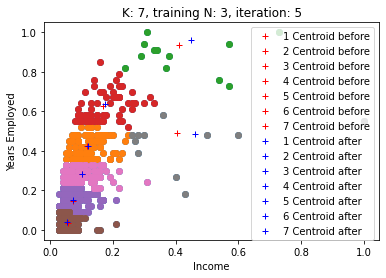

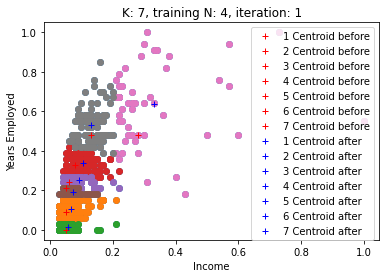

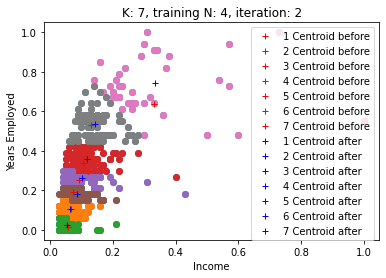

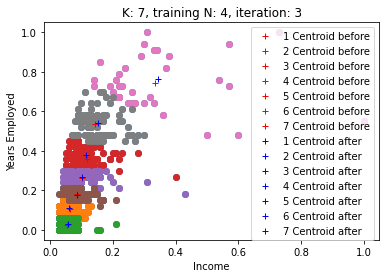

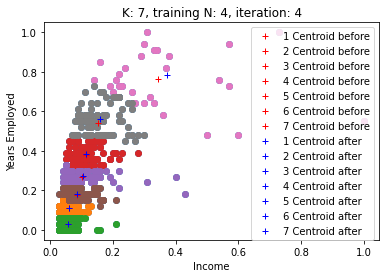

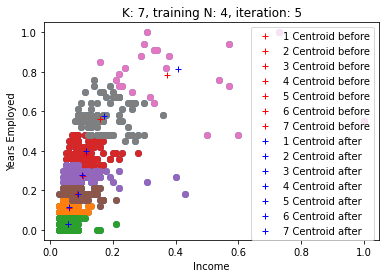

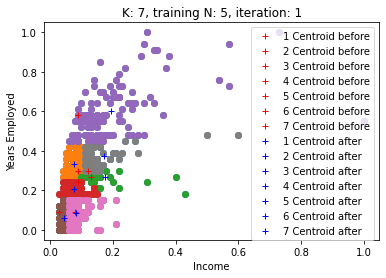

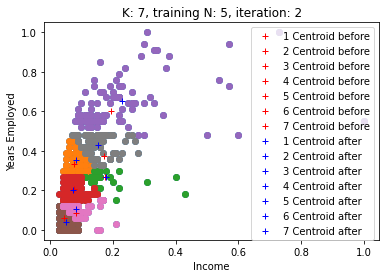

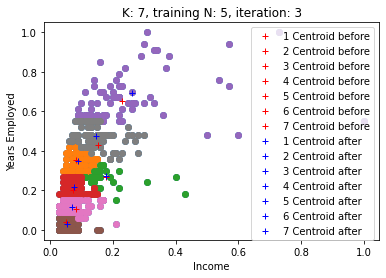

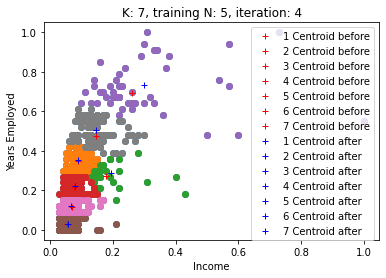

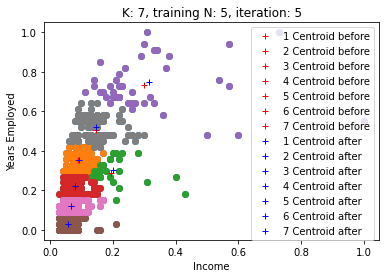

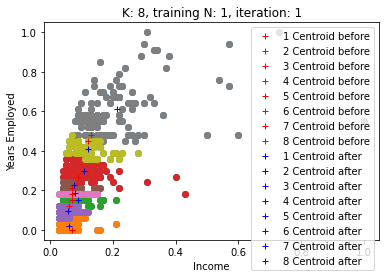

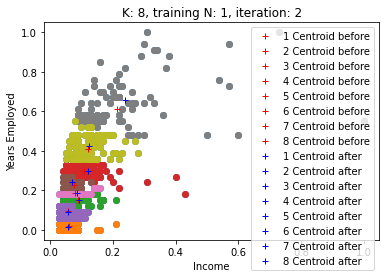

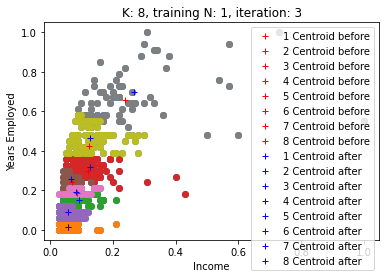

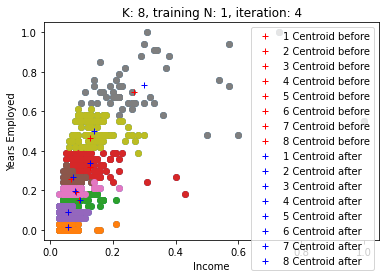

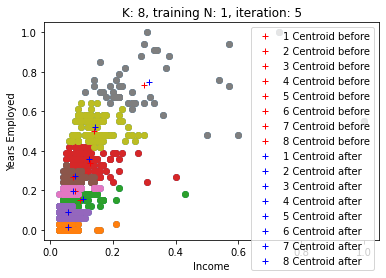

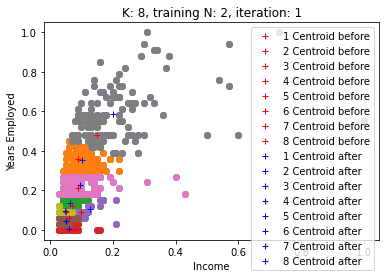

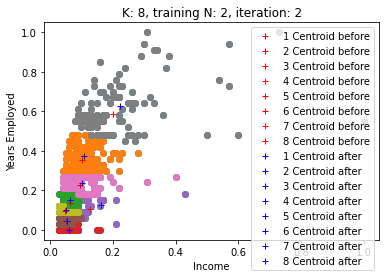

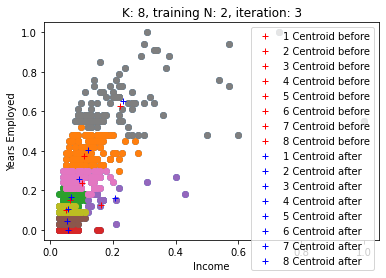

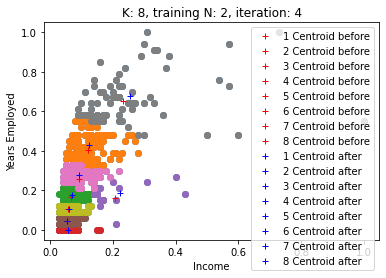

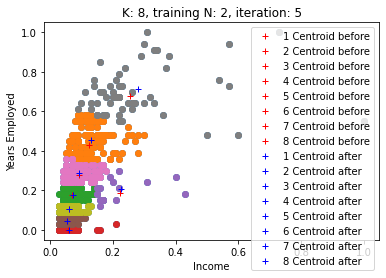

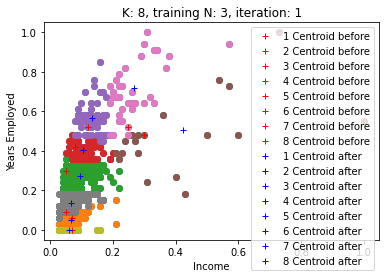

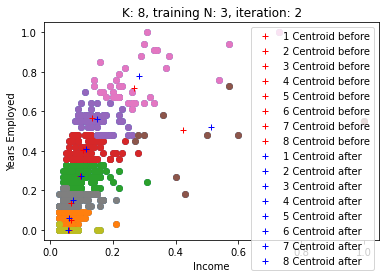

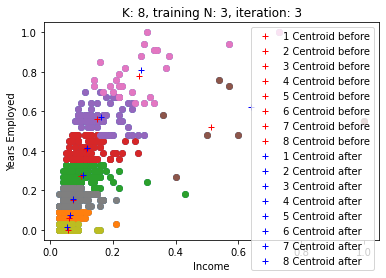

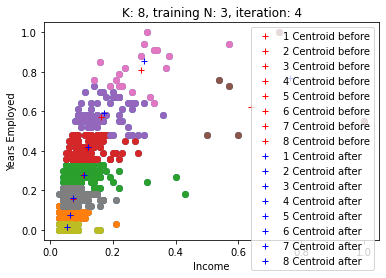

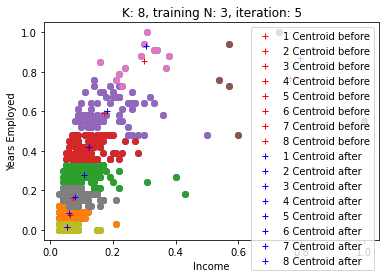

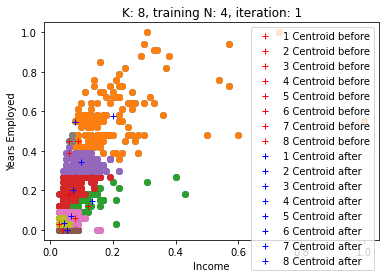

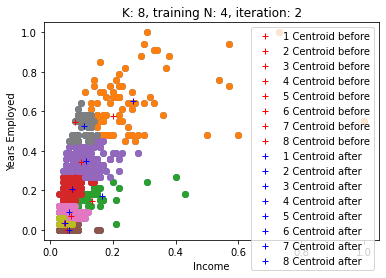

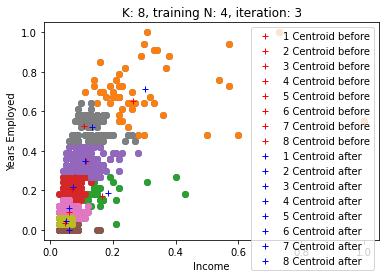

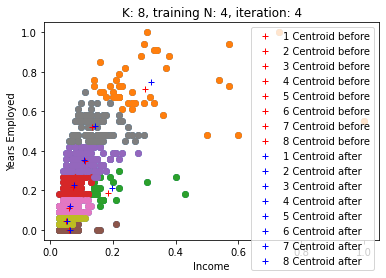

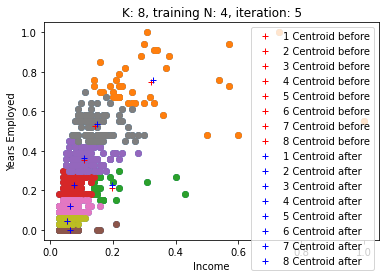

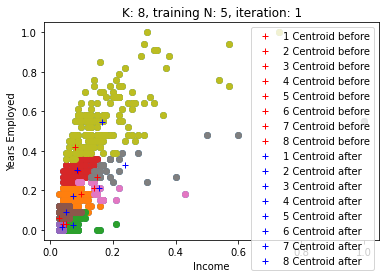

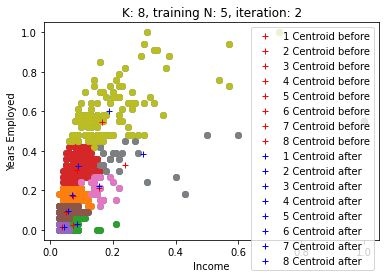

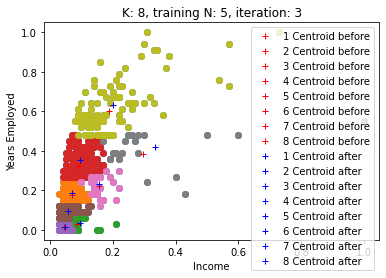

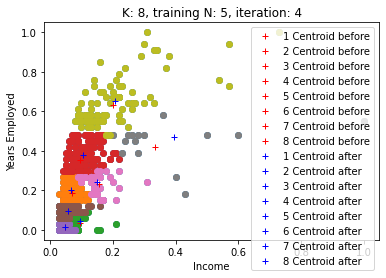

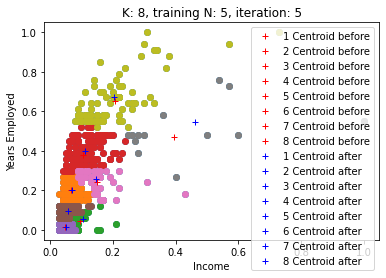

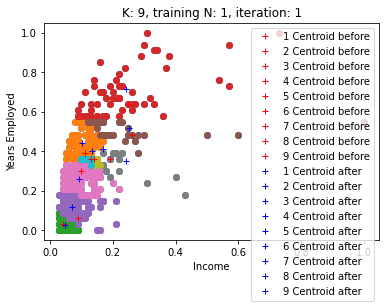

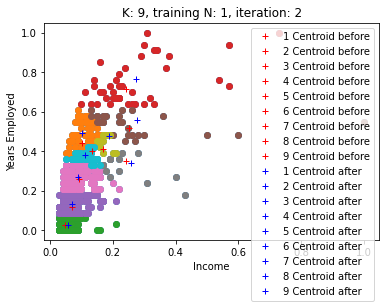

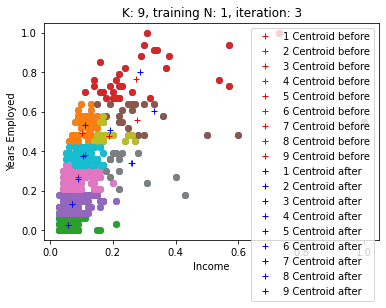

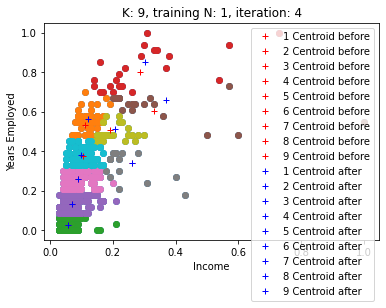

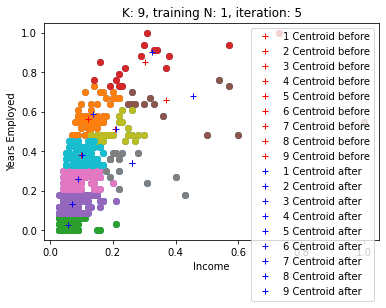

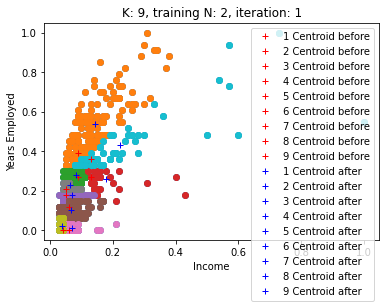

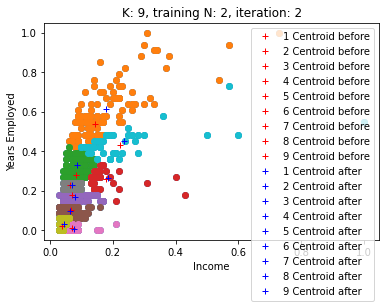

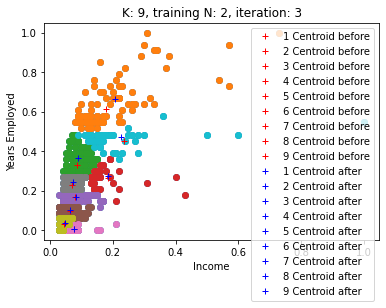

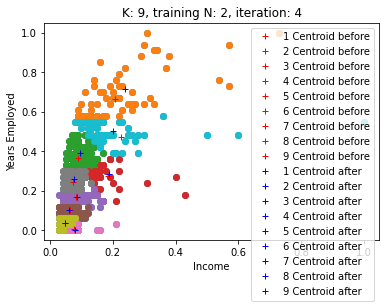

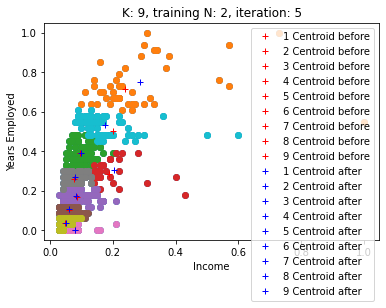

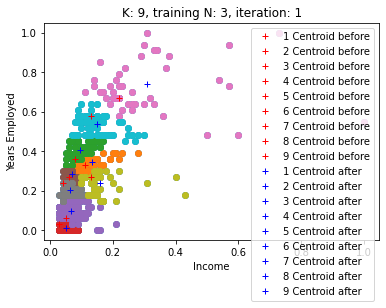

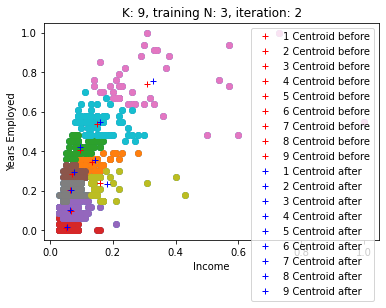

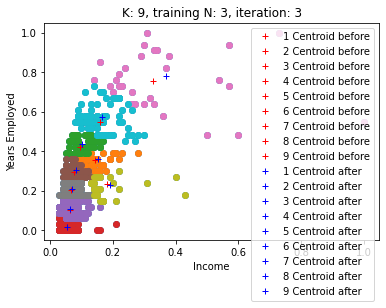

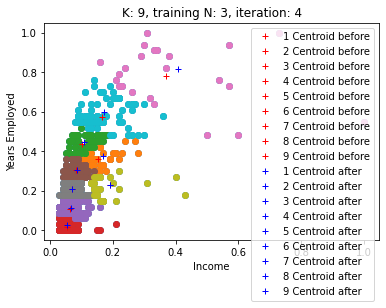

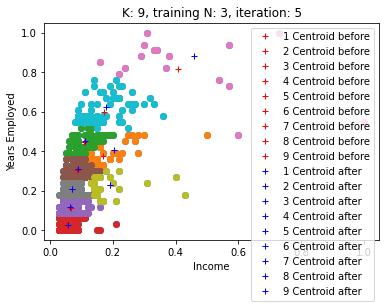

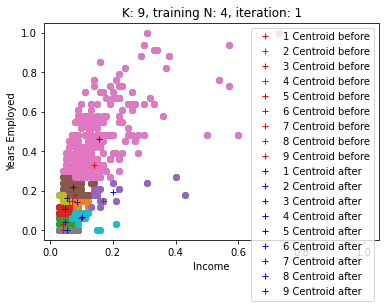

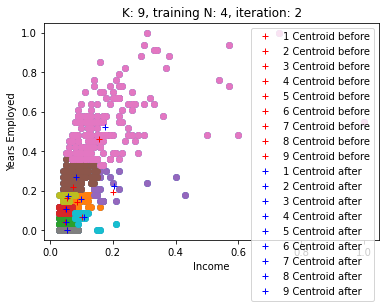

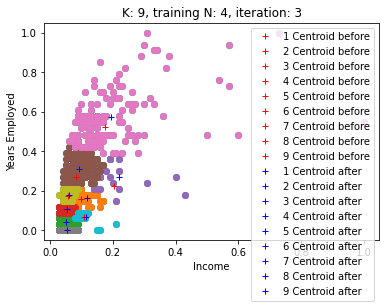

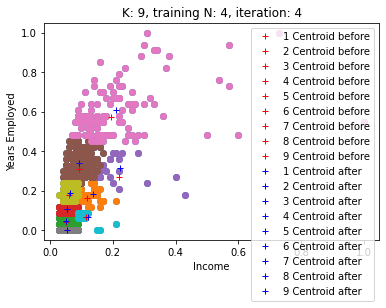

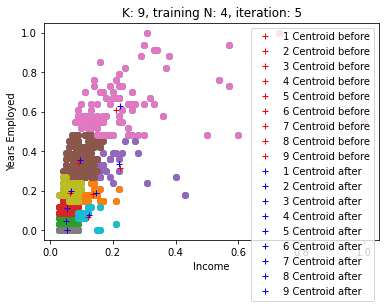

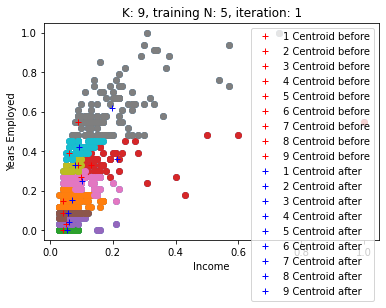

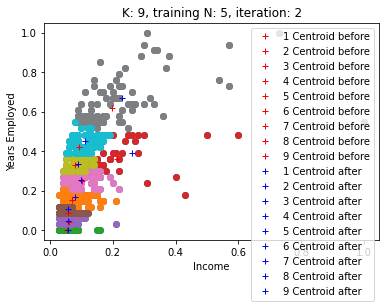

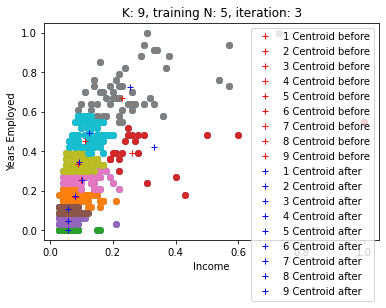

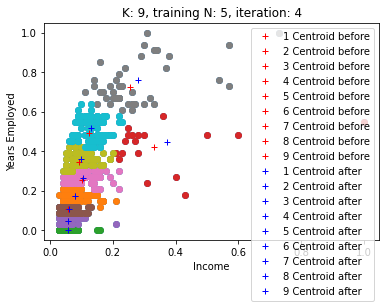

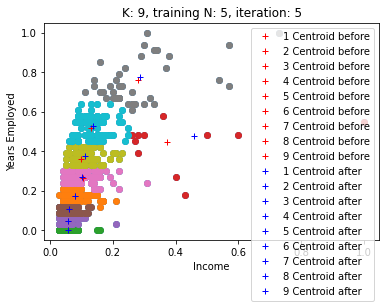

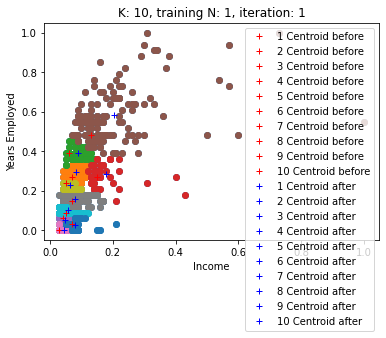

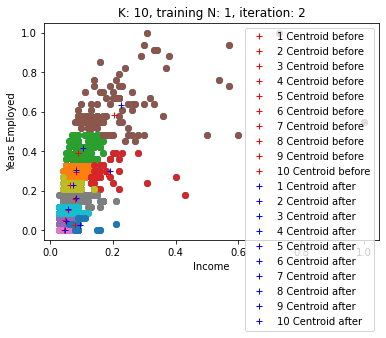

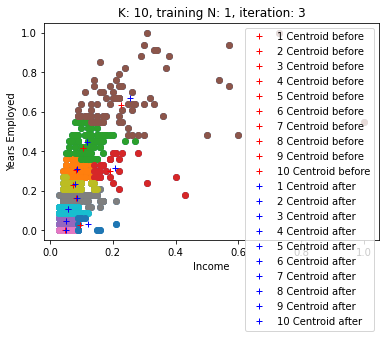

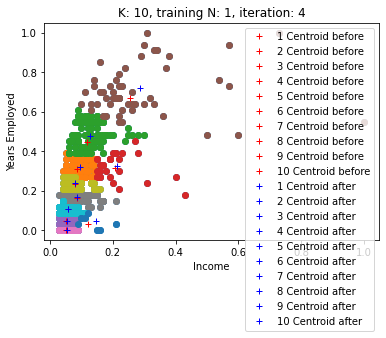

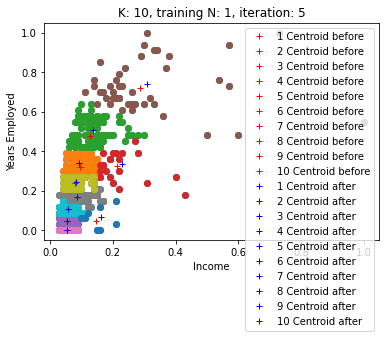

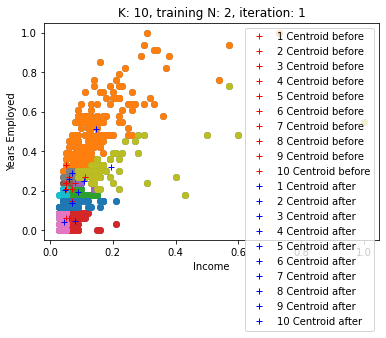

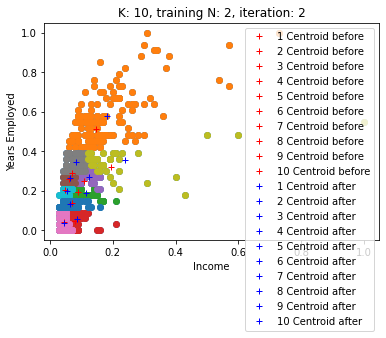

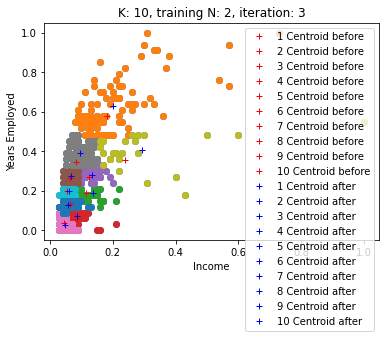

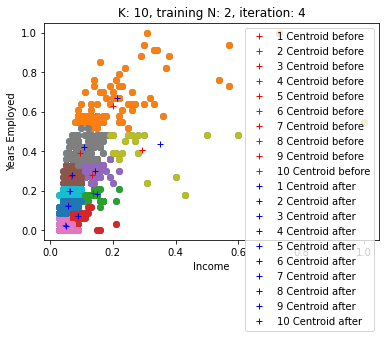

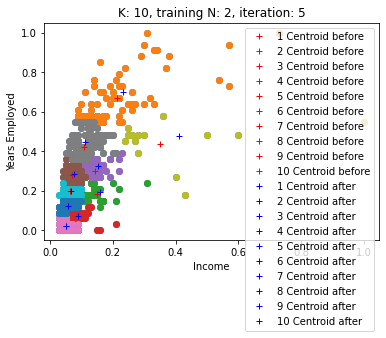

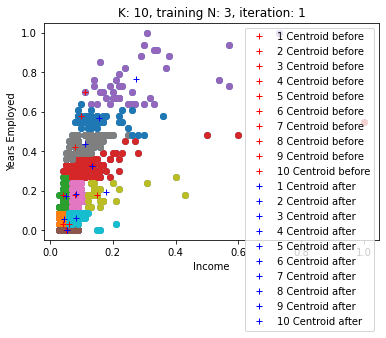

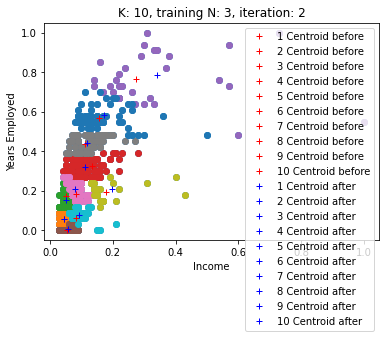

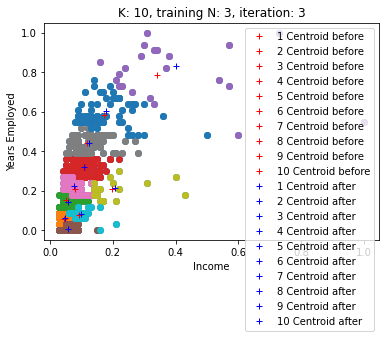

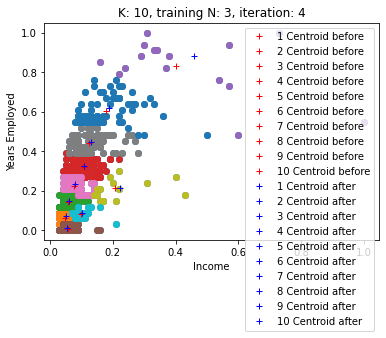

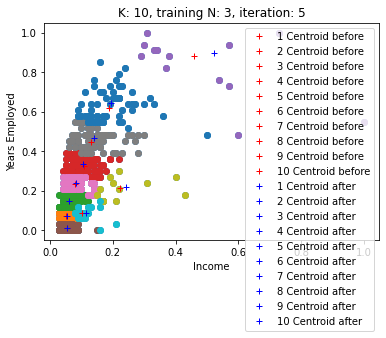

Centroid 6 doesn't have any point


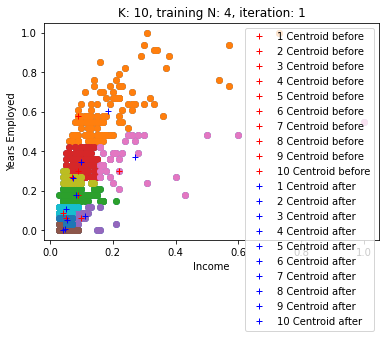

There is no point assigned to this 6 centroid


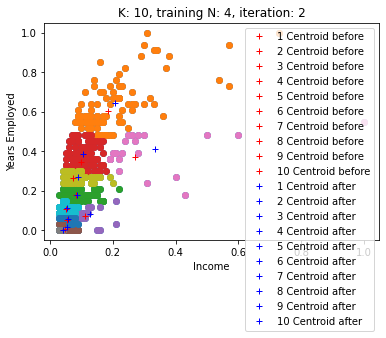

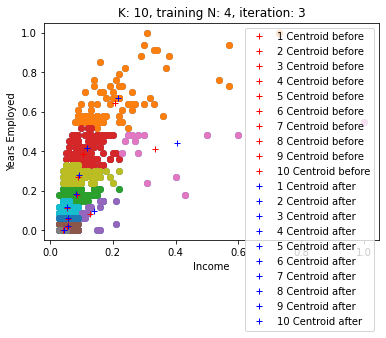

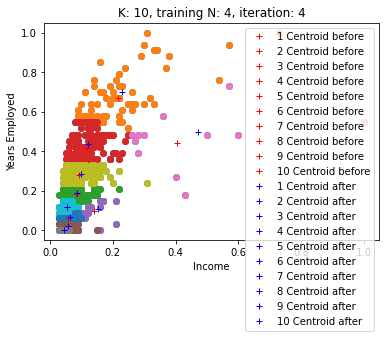

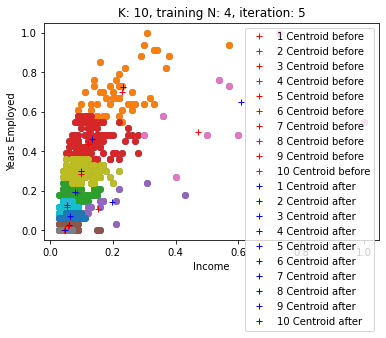

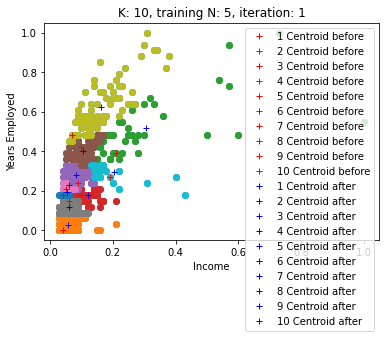

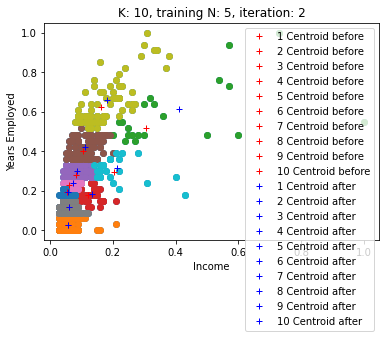

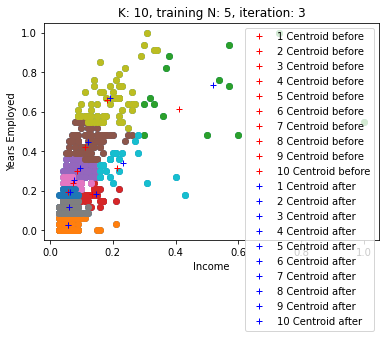

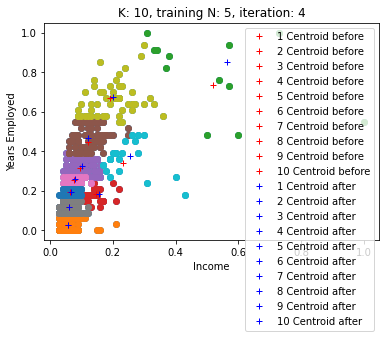

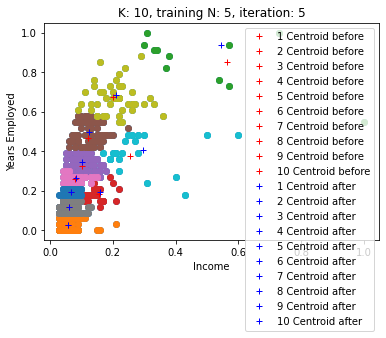

In [16]:
def store_model(k_mean_model):
    return [k_mean_model.centroids, model_kmean.cost_functions]

model_kmean.NUMBER_OF_CENTROIDS_INITIALIZATION = 5  # let's increase number of random tries
min_k = 2
max_k = 10  # how many k we want to explore
results_by_k = []  # to store resutls

for k in range(min_k, max_k+1):
    model_kmean.number_of_centroids = k
    model_kmean.fit()
    results_by_k.append(store_model(model_kmean))
    model_kmean.cost_functions = None  # reset best model results to store a new one
    # model_kmean.set_monitor(False)  # to disable visualization each step

# Section 5<a id='id_5'></a> - results

Let's find our what we just trained!

Text(0, 0.5, 'Cost function')

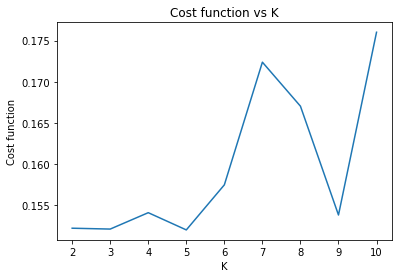

In [17]:
axis_x = [x+min_k for x in range(max_k - min_k + 1)]

centroids_by_k = []
cost_functions_by_k = []

for k_results in results_by_k:
    centroids_by_k.append(k_results[0])
    
    # return the min cost function for particular k
    cost_functions_by_k.append((k_results[1][-1]))
    
plt.plot(axis_x, cost_functions_by_k)
plt.title("Cost function vs K")
plt.xlabel("K")
plt.ylabel("Cost function")

Cost functions for each K was taken as a cost function of the best trained model for particular number of centroids (K) of the last iteration (in our case - 5th iteration). Based on the picture above we can see that K = [2, 3, 5] is good. The best K based on the lowest cost functions is:

In [18]:
min_cost_function = float("inf")
k_best = None
for idx in range(len(cost_functions_by_k)):
    k = idx + min_k
    if min_cost_function > cost_functions_by_k[idx]:
        min_cost_function = cost_functions_by_k[idx]
        k_best = k
print("Best K is", k_best)

Best K is 5


Let's set centroids of K = 5 to our model and try to predict which cluster a new customer is belong to.

In [19]:
customer_data = test_data[20]
customer_data  # income, years of employed

[0.06, 0.15]

In [20]:
best_centroids = centroids_by_k[k_best - min_k]  # this is our best centroids from our K = 5
best_centroids

[[0.19454494774105843, 0.5726270955486146],
 [0.09118599771283756, 0.28134241729899934],
 [0.053608498534171364, 0.08063670915819787],
 [0.12748539892757962, 0.15752650013355549],
 [0.06080041797283175, 0.004928941724051094]]

In [21]:
# set best learned centroids to our model
model_kmean.set_best_centroids(best_centroids)

In [22]:
model_kmean.predict(customer_data)

3

The customer with scaled data [0.06 Income, 0.15 Years of Employed] belongs to a cluster 4 (3 + 1).